# import module

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import wordcloud
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import matplotlib.pyplot as plt
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, make_scorer, roc_auc_score, roc_curve, precision_recall_fscore_support, f1_score
from sklearn.utils import class_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import re
import pandas as pd
import seaborn as sns
from collections import Counter
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import sys
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('Python Version : {}'.format(sys.version))
print('Pandas Version : {}'.format(pd.__version__))
print('Numpy Version : {}'.format(np.__version__))
print('Sklearn Version : {}'.format(sklearn.__version__))
print('Keras Version : {}'.format(keras.__version__))

Python Version : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Pandas Version : 1.1.5
Numpy Version : 1.19.5
Sklearn Version : 1.0.1
Keras Version : 2.7.0


# 데이터 분석 및 전처리

In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

for i in range(len(train)):
    word_tokens = word_tokenize(train.loc[i,'mail'])

    result = ''
    for w in word_tokens: 
        if w not in stop_words: 
            w = w+ ' '
            result += w
    train.loc[i,'mail'] = result

In [ ]:
import re
for i in range(len(train)):
    train.loc[i,'mail'] = re.sub('Subject', ' ', train.loc[i,'mail'])
    train.loc[i,'mail'] = re.sub('\r\n',' ', train.loc[i,'mail'])
    train.loc[i,'mail'] = re.sub('[^a-zA-Z]', ' ', train.loc[i,'mail'])
    train['mail'] = train['mail'].str.lower()
    train['mail'] = train['mail'].str.strip()
train['mail'][0]

'update prc process please read attached memo sally   discuss staff meeting afternoon                                               forwarded brenda f herod   hou   ect                                                                              enron north america corp     sally beck                        pm   kristin albrecht   hou   ect   ect   scott earnest   hou   ect   ect   sheila glover   hou   ect   ect   todd hall   hou   ect   ect   peggy hedstrom   cal   ect   ect   brenda f herod   hou   ect   ect   brent price   hou   ect   ect   leslie reeves   hou   ect   ect   stephen p schwarz   hou   ect   ect   james scribner   corp   enron   enron   mary solmonson   hou   ect   ect   sheri thomas   hou   ect   ect   shona wilson   na   enron   enron   eugenio perez   hou   ect   ect   steve jackson   hou   ect   ect   susan harrison   hou   ect   ect   robert superty   hou   ect   ect   michael e moscoso   hou   ect   ect   steve venturatos   hou   ect   ect   scott mills   hou   

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = TfidfVectorizer()

spam, ham = train[train.label == 1], train[train.label ==0]

N = 50
words_importance = pd.DataFrame()

spam_matrix = vect.fit_transform(spam.mail)   
words_importance['top_spam'] = sorted(zip(vect.get_feature_names(),spam_matrix.sum(axis=0).tolist()[0]), key=lambda x: -x[1])[:N]
ham_matrix = vect.fit_transform(ham.mail)   
words_importance['top_ham'] = sorted(zip(vect.get_feature_names(),ham_matrix.sum(axis=0).tolist()[0]), key=lambda x: -x[1])[:N]

words_importance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,top_spam,top_ham
0,"(subject, 47.726632434265845)","(ect, 194.32137875668252)"
1,"(http, 22.21812916834774)","(enron, 140.33945488308524)"
2,"(com, 21.660214892695077)","(hpl, 120.49627630839218)"
3,"(get, 16.29829433367182)","(xls, 113.62238170373197)"
4,"(www, 15.384138635823748)","(subject, 110.08014952708514)"
5,"(click, 14.348997460824192)","(hou, 104.98970808322704)"
6,"(want, 12.230174959126648)","(deal, 88.43549119035457)"
7,"(new, 12.143823650960819)","(meter, 79.69531127411445)"
8,"(us, 12.000603746399145)","(gas, 75.83595989689371)"
9,"(please, 11.92625964113751)","(attached, 68.72241217207849)"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


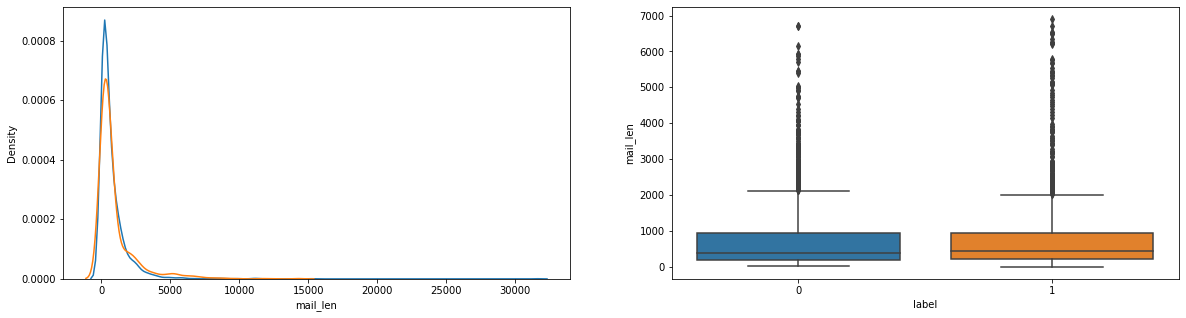

In [ ]:
train['mail_len'] = train.mail.map(lambda x: len(x))

spam, ham = train[train.label == 1], train[train.label ==0]

fig1, axes = plt.subplots(1,2, figsize=(20 ,5))

sns.distplot(ham.mail_len, hist=False, rug=False, label='ham', ax=axes[0])
sns.distplot(spam.mail_len, hist=False, rug=False, label='spam', ax=axes[0])

sns.boxplot(x='label', y='mail_len', data=train[train['mail_len']<7000], ax=axes[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

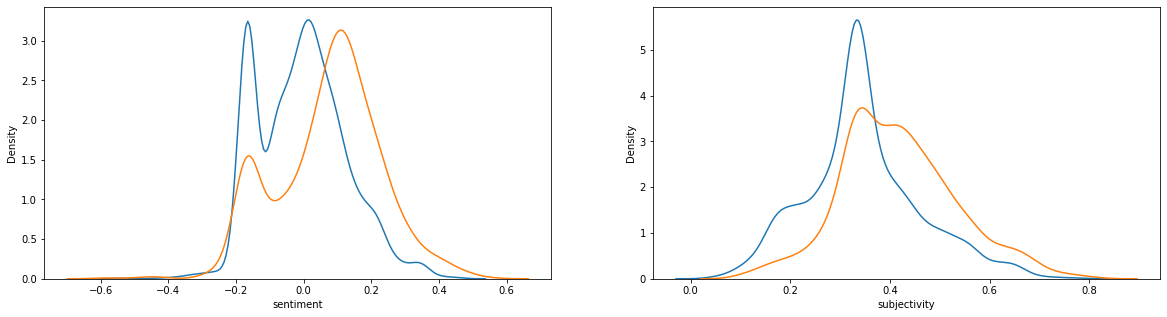

In [ ]:
blob = train['mail'].map(lambda x: TextBlob(x))
train['sentiment'] = blob.map(lambda x: x.sentiment.polarity)
train['subjectivity'] = blob.map(lambda x: x.sentiment.subjectivity)

spam, ham = train[train.label == 1], train[train.label ==0]

fig1, axes = plt.subplots(1,2, figsize=(20 ,5))

sns.distplot(ham.sentiment, hist=False, rug=False, label='ham', ax=axes[0])
sns.distplot(spam.sentiment, hist=False, rug=False, label='spam', ax=axes[0])

sns.distplot(ham.subjectivity, hist=False, rug=False, label='ham', ax=axes[1])
sns.distplot(spam.subjectivity, hist=False, rug=False, label='spam', ax=axes[1])

plt.show()

# Model(기존 모델 사용)

In [ ]:
max_features = 3000

vect = TfidfVectorizer(max_features=max_features)
vect_fit = vect.fit(train.mail)
matrix = vect_fit.transform(train.mail)
df_words = pd.DataFrame(matrix.toarray(), columns=vect_fit.get_feature_names())
df_words['label'] = train['label']
df_words['mail'] = train['mail']
df_words['sentiment_feature'] = train['sentiment']
df_words['subjectivity_feature'] = train['subjectivity']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_words

,abdv,ability,able,absence,absolutely,ac,accept,acceptance,access,according,accordingly,account,accountant,accounting,accounts,accuracy,accurate,achieve,acock,acquire,acquisition,across,act,action,actions,active,activities,activity,acton,acts,actual,actually,actuals,ad,add,added,adding,addition,additional,additionally,...,working,works,worksheet,world,worldnet,worldwide,worth,would,write,writeoff,written,wrong,www,wynne,wysak,xanax,xl,xls,xm,xp,ya,yahoo,yap,year,years,yes,yesterday,yet,york,young,yvette,zajac,zero,zeroed,zivley,zone,zonedubai,label,sentiment_feature,subjectivity_feature
0,0.0,0.028182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033837,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033837,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.044468,0.0,0.0,0.0,0.0256,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,0.144916,0.398177
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.077028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.125496,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.074188,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.086725,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1,0.199197,0.420570
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.102210,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.206985,0.0,0.000000,0.0,0,-0.111111,0.305556
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.460934,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,-0.166667,0.333333
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.112569,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1,0.213939,0.287576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.094502,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1,-0.023131,0.405859
3616,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,-0.166667,0.333333
3617,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.

### 1. MultinomialNB

In [ ]:
df_words_copy = df_words.copy()
df_words_copy['sentiment_feature'] = df_words_copy['sentiment_feature'] + 1
train_df, test_df = train_test_split(df_words_copy, test_size=0.20, stratify=df_words['label'])


mnb = MultinomialNB()
X_train = train_df[train_df.columns.difference(['mail','label'])]
mnb.fit(X_train, train_df['label'].values)

X_test = test_df[test_df.columns.difference(['mail','label'])]
test_predicted_proba = mnb.predict_proba(X_test)[:,1]
test_predicted = mnb.predict(X_test)
    
auc_score = roc_auc_score(test_df['label'], test_predicted_proba)
print('ROC AUC: {0:.4f}'.format(auc_score))

print(classification_report(test_df['label'].values, test_predicted)) 

ROC AUC: 0.9919
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       518
           1       0.89      0.94      0.92       206

    accuracy                           0.95       724
   macro avg       0.93      0.95      0.94       724
weighted avg       0.95      0.95      0.95       724



### 2.LGBMclassifier

In [ ]:
train_df, test_df = train_test_split(df_words, test_size=0.20, stratify=df_words['label'])


lgb = lgbm.LGBMClassifier(n_jobs=-1, importance_type='gain')

X_train = train_df[train_df.columns.difference(['mail','label'])]
lgb.fit(X_train, train_df['label'].values)
    
X_test = test_df[test_df.columns.difference(['mail','label'])]
test_predicted_proba = lgb.predict_proba(X_test)[:,1]
test_predicted = lgb.predict(X_test)
    
auc_score = roc_auc_score(test_df['label'], test_predicted_proba)
print('ROC AUC: {0:.4f}'.format(auc_score))
    
print(classification_report(test_df['label'].values, test_predicted)) 

ROC AUC: 0.9960
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       518
           1       0.93      0.98      0.96       206

    accuracy                           0.97       724
   macro avg       0.96      0.98      0.97       724
weighted avg       0.97      0.97      0.97       724



### 3.Random Forest Classification

In [ ]:
train_df, test_df = train_test_split(df_words, test_size=0.20, stratify=df_words['label'])


rfc = RandomForestClassifier(n_estimators=37, random_state=252)

X_train = train_df[train_df.columns.difference(['mail','label'])]
rfc.fit(X_train, train_df['label'].values)
    
X_test = test_df[test_df.columns.difference(['mail','label'])]
test_predicted_proba = rfc.predict_proba(X_test)[:,1]
test_predicted = rfc.predict(X_test)
    
auc_score = roc_auc_score(test_df['label'], test_predicted_proba)
print('ROC AUC: {0:.4f}'.format(auc_score))
    
print(classification_report(test_df['label'].values, test_predicted)) 

ROC AUC: 0.9945
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       518
           1       0.94      0.99      0.96       206

    accuracy                           0.98       724
   macro avg       0.97      0.98      0.97       724
weighted avg       0.98      0.98      0.98       724



# Model(layer 쌓음)

### 1. Linear + Relu

In [ ]:
import keras

from keras.layers import Input, Dense
from keras.models import Model,load_model
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
import sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras import backend as K

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
target = 'label'
train_df, test_df = train_test_split(df_words, test_size=0.20, stratify=df_words[target])

X_train = train_df[train_df.columns.difference(['mail','label'])]
y_train = train_df[target]
X_test = test_df[test_df.columns.difference(['mail','label'])]
y_test = test_df[target]

In [ ]:
X_train.shape

(2896, 3001)

In [ ]:
model_save_path = '/content/drive/MyDrive/기계학습/model/spam.h5'

my_model = Sequential()
my_model.add(Dense(512, activation='relu', input_shape = (3001,)))
my_model.add(Dropout(0.5))
my_model.add(Dense(256, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(1, activation='sigmoid'))
my_model.summary()
my_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc',f1_m,precision_m, recall_m])

checkpointer = ModelCheckpoint(filepath=model_save_path,
                               monitor = 'val_loss',
                               mode = 'min',
                               verbose=1,
                               save_best_only=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1537024   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,668,609
Trainable params: 1,668,609
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
45/46 [============================>.] - ETA: 0s - loss: 0.4024 - acc: 0.7878 - f1_m: 0.3504 - precision_m: 0.4678 - recall_m: 0.3304
Epoch 00001: val_loss improved from inf to 0.13021, saving model to /content/drive/MyDrive/기계학습/model/spam.h5
46/46 [==============================] - 2s 27ms/step - loss: 0.4020 - acc: 0.7887 - f1_m: 0.3602 - precision_m: 0.4794 - recall_m: 0.3377 - val_loss: 0.1302 - val_acc: 0.9696 - val_f1_m: 0.9485 - val_precision_m: 0.9279 - val_recall_m: 0.9728
Epoch 2/10
45/46 [============================>.] - ETA: 0s - loss: 0.0592 - acc: 0.9851 - f1_m: 0.9725 - precision_m: 0.9630 - recall_m: 0.9838
Epoch 00002: val_loss improved from 0.13021 to 0.05860, saving model to /content/drive/MyDrive/기계학습/model/spam.h5
46/46 [==============================] - 1s 16ms/step - loss: 0.0589 - acc: 0.9852 - f1_m: 0.9731 - precision_m: 0.9638 - recall_m: 0.9842 - val_loss: 0.0586 - val_acc: 0.9779 - val_f1_m: 0.9579 - val_precision_m: 0.9646 - val_recall_m: 0.954

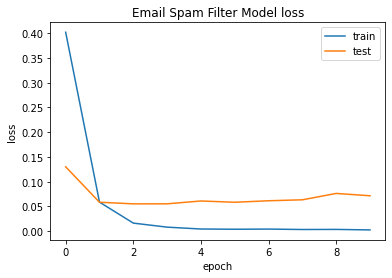

In [ ]:
history = my_model.fit(X_train.to_numpy(),y_train.to_numpy(),
            batch_size=64,
            epochs=10,
            verbose=1,
            shuffle=True,
            validation_data=(X_test.to_numpy(), y_test.to_numpy()),
            callbacks=[checkpointer]).history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### 2. LSTM

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, Flatten
from keras.preprocessing import sequence

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x=train['mail']
y=train['label']

In [ ]:
max_words=3000
max_len=50
token=Tokenizer(num_words=max_words)
token.fit_on_texts(train['mail'])
sequences=token.texts_to_sequences(x)
sequences_metrix=sequence.pad_sequences(sequences,padding='post',maxlen=max_len)

In [ ]:
model_save_path = '/content/drive/MyDrive/기계학습/model/LSTM.h5'

my_model_LSTM = Sequential()
my_model_LSTM.add(Embedding(max_words, 64, input_length=max_len))
my_model_LSTM.add(LSTM(32, dropout=0.5, return_sequences=True))
my_model_LSTM.add(LSTM(32, dropout=0.5, return_sequences=False))
my_model_LSTM.add(Dense(1, activation='sigmoid'))
my_model_LSTM.summary()

my_model_LSTM.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc',f1_m,precision_m, recall_m])

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            192000    
                                                                 
 lstm (LSTM)                 (None, 50, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 212,769
Trainable params: 212,769
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
46/46 [==============================] - 44s 96ms/step - loss: 0.5322 - acc: 0.7486 - f1_m: 0.1700 - precision_m: 0.3162 - recall_m: 0.1448 - val_loss: 0.1727 - val_acc: 0.9461 - val_f1_m: 0.9056 - val_precision_m: 0.8559 - val_recall_m: 0.9649
Epoch 2/10
46/46 [==============================] - 3s 75ms/step - loss: 0.1372 - acc: 0.9555 - f1_m: 0.9227 - precision_m: 0.8866 - recall_m: 0.9709 - val_loss: 0.1000 - val_acc: 0.9682 - val_f1_m: 0.9402 - val_precision_m: 0.9153 - val_recall_m: 0.9701
Epoch 3/10
46/46 [==============================] - 3s 69ms/step - loss: 0.0713 - acc: 0.9820 - f1_m: 0.9661 - precision_m: 0.9487 - recall_m: 0.9870 - val_loss: 0.0673 - val_acc: 0.9793 - val_f1_m: 0.9666 - val_precision_m: 0.9437 - val_recall_m: 0.9918
Epoch 4/10
46/46 [==============================] - 3s 64ms/step - loss: 0.0434 - acc: 0.9893 - f1_m: 0.9810 - precision_m: 0.9783 - recall_m: 0.9849 - val_loss: 0.0764 - val_acc: 0.9779 - val_f1_m: 0.9646 - val_precision_m: 0.9401 - 

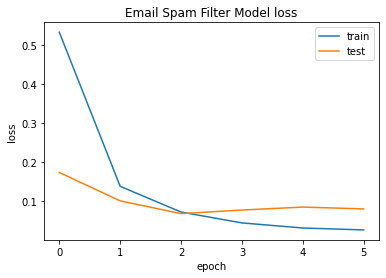

In [ ]:
history = my_model_LSTM.fit(sequences_metrix,y,
            batch_size=64,
            epochs=10,
            shuffle=True,
            validation_split = 0.2,
            callbacks=[es]).history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### 3. LSTM 추가

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Flatten

In [ ]:
x=train['mail']
y=train['label']

In [ ]:
max_words=3000
max_len=50
token=Tokenizer(num_words=max_words)
token.fit_on_texts(train['mail'])
sequences=token.texts_to_sequences(x)
sequences_metrix=sequence.pad_sequences(sequences,padding='post',maxlen=max_len)

In [ ]:
model_with_LSTM = Sequential()
model_with_LSTM.add(Embedding(max_words, 32, input_length=max_len))
model_with_LSTM.add(LSTM(32,return_sequences=True,dropout=0.5))
model_with_LSTM.add(Flatten()) 
# Dense layer
model_with_LSTM.add(Dense(512,activation='relu',name='hl1')) # hidden layer 1
model_with_LSTM.add(Dropout(0.5))
model_with_LSTM.add(Dense(256,activation='relu',name='hl2')) # hidden layer 2
model_with_LSTM.add(Dropout(0.5))
model_with_LSTM.add(Dense(1,activation='sigmoid',name='ol')) # output layer
model_with_LSTM.summary()
model_with_LSTM.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc',f1_m,precision_m, recall_m])

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            96000     
                                                                 
 lstm_4 (LSTM)               (None, 50, 32)            8320      
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 hl1 (Dense)                 (None, 512)               819712    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 hl2 (Dense)                 (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)              

Epoch 1/10
46/46 [==============================] - 6s 66ms/step - loss: 0.3829 - acc: 0.8073 - f1_m: 0.4291 - precision_m: 0.4979 - recall_m: 0.4297 - val_loss: 0.0994 - val_acc: 0.9669 - val_f1_m: 0.9385 - val_precision_m: 0.8902 - val_recall_m: 0.9962
Epoch 2/10
46/46 [==============================] - 2s 48ms/step - loss: 0.0729 - acc: 0.9738 - f1_m: 0.9525 - precision_m: 0.9382 - recall_m: 0.9699 - val_loss: 0.0968 - val_acc: 0.9599 - val_f1_m: 0.9287 - val_precision_m: 0.8721 - val_recall_m: 0.9962
Epoch 3/10
46/46 [==============================] - 2s 45ms/step - loss: 0.0387 - acc: 0.9879 - f1_m: 0.9767 - precision_m: 0.9751 - recall_m: 0.9805 - val_loss: 0.0685 - val_acc: 0.9751 - val_f1_m: 0.9573 - val_precision_m: 0.9572 - val_recall_m: 0.9579
Epoch 4/10
46/46 [==============================] - 2s 45ms/step - loss: 0.0272 - acc: 0.9910 - f1_m: 0.9841 - precision_m: 0.9797 - recall_m: 0.9893 - val_loss: 0.0884 - val_acc: 0.9751 - val_f1_m: 0.9575 - val_precision_m: 0.9722 - v

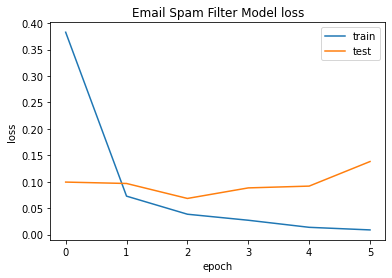

In [ ]:
history = model_with_LSTM.fit(sequences_metrix,y,
            batch_size=64,
            epochs=10,
            shuffle=True,
            validation_split = 0.2,
            callbacks=[es]).history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

# Test(예측)

In [ ]:
test = pd.read_csv('./data/test.csv')

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

for i in range(len(test)):
    word_tokens = word_tokenize(test.loc[i,'mail'])

    result = ''
    for w in word_tokens: 
        if w not in stop_words: 
            w = w+ ' '
            result += w
    test.loc[i,'mail'] = result

In [ ]:
import re
for i in range(len(test)):
    test.loc[i,'mail'] = re.sub('Subject', ' ', test.loc[i,'mail'])
    test.loc[i,'mail'] = re.sub('\r\n',' ', test.loc[i,'mail'])
    test.loc[i,'mail'] = re.sub('[^a-zA-Z]', ' ', test.loc[i,'mail'])
    test['mail'] = test['mail'].str.lower()
    test['mail'] = test['mail'].str.strip()
test['mail'][0]

'coastal ctr            meter         sit          discussed matter brian riley   hpl intention contacting coastal negotiate type deal affecting gas received september meter        brian   opinion gas considered strangers gas since hpl contract price   suggested nick moshou contact counterpart coastal   relaying information suggesting coastal   trader contract brian riley   donald mary poorman   enron                          nick moshou   corp   enron   enron cc   anita luong   hou   ect   ect   brian riley   hou   ect   ect   pat clynes   corp   enron   enron   daren j farmer   hou   ect   ect   donald p reinhardt   hou   ect   ect subject     coastal ctr            meter         sit          nick   understand terminated agreement   however     feel confiscate production   need either pay gas   cut deal redeliver like volume another meter   given decrease prices september current prompt month   would guess want paid     know call     know responsibility lies far calling explain took 

In [ ]:
blob_test = test['mail'].map(lambda x: TextBlob(x))
test['sentiment'] = blob_test.map(lambda x: x.sentiment.polarity)
test['subjectivity'] = blob_test.map(lambda x: x.sentiment.subjectivity)
test['label'] = 0

In [ ]:
test

,id,mail,sentiment,subjectivity,label
0,0,coastal ctr meter sit ...,-0.022222,0.577778,0
1,1,subject fyi ...,0.063333,0.343333,0
2,2,subject hpl nomination changes july july ...,0.008333,0.570833,0
3,3,subject new stack manager new version stack ...,0.109481,0.406602,0
4,4,subject deletion enrononline user id passwor...,0.120896,0.433775,0
...,...,...,...,...,...
1546,1546,subject meter three rivers iss...,0.040606,0.304242,0
1547,1547,subject southern union may st p...,0.066667,0.316667,0
1548,1548,subject sweet virgins love hard sex firs...,0.117262,0.497024,0
1549,1549,subject fw cell phones latest scoop cell...,0.178050,0.532399,0


In [ ]:
matrix_test = vect_fit.transform(test.mail)

test_df = pd.DataFrame(matrix_test.toarray(), columns=vect_fit.get_feature_names())
test_df['label'] = test['label']
test_df['mail'] = test['mail']

test_df['sentiment_feature'] = test['sentiment']
test_df['subjectivity_feature'] = test['subjectivity']

test_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdv,ability,able,absence,absolutely,ac,accept,acceptance,access,according,accordingly,account,accountant,accounting,accounts,accuracy,accurate,achieve,acock,acquire,acquisition,across,act,action,actions,active,activities,activity,acton,acts,actual,actually,actuals,ad,add,added,adding,addition,additional,additionally,...,working,works,worksheet,world,worldnet,worldwide,worth,would,write,writeoff,written,wrong,www,wynne,wysak,xanax,xl,xls,xm,xp,ya,yahoo,yap,year,years,yes,yesterday,yet,york,young,yvette,zajac,zero,zeroed,zivley,zone,zonedubai,label,sentiment_feature,subjectivity_feature
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.022222,0.577778
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.063333,0.343333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.008333,0.570833
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086731,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.109481,0.406602
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.120896,0.433775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.245472,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.040606,0.304242
1547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.224298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.066667,0.316667
1548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.407955,0.0,0.0,0.0,

### 1. Multinomail NB

In [ ]:
X_test = test_df[test_df.columns.difference(['mail','label'])]
y_pred = mnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_MNB.csv')

### 2.LGBM Classifier

In [ ]:
X_test = test_df[test_df.columns.difference(['mail','label'])]
y_pred = lgb.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_LGB.csv')

### 3. RandomForest

In [ ]:
X_test = test_df[test_df.columns.difference(['mail','label'])]
y_pred = rfc.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_RFC.csv')

# Deep Learning

### 1. Linear layer

In [ ]:
X_test = test_df[test_df.columns.difference(['mail','label'])]
y_pred = my_model.predict(X_test.to_numpy())

y_pred

array([[3.6162490e-10],
       [1.3390304e-07],
       [8.9388642e-08],
       ...,
       [9.9918640e-01],
       [2.9853155e-07],
       [1.7882800e-07]], dtype=float32)

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict[test_predict['label']>=0.5] = 1
test_predict[test_predict['label']<0.5] = 0
test_predict

,index,label
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1546,0,0.0
1547,0,0.0
1548,1,1.0
1549,0,0.0


In [ ]:
Y = LabelEncoder().fit_transform(test_predict['label']).reshape(-1,1)
test_predict = pd.DataFrame(Y,columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_linear.csv')

### 2. LSTM

In [ ]:
x_test=test['mail']
y_test=test['label']

In [ ]:
max_words=3000
max_len=50
test_sequences=token.texts_to_sequences(x_test)
test_sequences_metrix=sequence.pad_sequences(test_sequences,padding='post',maxlen=max_len)

In [ ]:
y_pred = my_model_LSTM.predict(test_sequences_metrix)
y_pred

array([[5.6096911e-04],
       [5.6251884e-04],
       [5.6305528e-04],
       ...,
       [9.9151278e-01],
       [5.6320429e-04],
       [5.6427717e-04]], dtype=float32)

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict[test_predict['label']>=0.5] = 1
test_predict[test_predict['label']<0.5] = 0
test_predict

,index,label
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1546,0,0.0
1547,0,0.0
1548,1,1.0
1549,0,0.0


In [ ]:
Y = LabelEncoder().fit_transform(test_predict['label']).reshape(-1,1)
test_predict = pd.DataFrame(Y,columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_LSTM.csv')

### 3. With LSTM

In [ ]:
y_pred = model_with_LSTM.predict(test_sequences_metrix)
y_pred

array([[1.5574016e-17],
       [2.6457890e-22],
       [2.7249021e-25],
       ...,
       [9.9999970e-01],
       [1.3411923e-17],
       [3.6893974e-20]], dtype=float32)

In [ ]:
test_predict = pd.DataFrame(y_pred, columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict[test_predict['label']>=0.5] = 1
test_predict[test_predict['label']<0.5] = 0
test_predict

,index,label
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1546,0,0.0
1547,0,0.0
1548,1,1.0
1549,0,0.0


In [ ]:
Y = LabelEncoder().fit_transform(test_predict['label']).reshape(-1,1)
test_predict = pd.DataFrame(Y,columns = ['label'])
test_predict.reset_index(inplace = True)
test_predict.rename(columns={'index':'id'}, inplace = True)
test_predict.set_index(test_predict['id'], inplace = True)
test_predict.drop(columns = ['id'], inplace = True)
test_predict.to_csv('/content/drive/MyDrive/기계학습/submission_with_LSTM.csv')